## Fitting data to probability density functions

A few common distributions

### Some distributions

- **Exponential.**
- **Power law.** 

- Gamma 

- **Log normal**. a probability distribution with a normally distributed logarithm. A random variable is lognormally distributed if its logarithm is normally distributed. Skewed distributions with low mean values, large variance, and all-positive values often fit this type of distribution. Values must be positive as log(x) exists only for positive values of x.


### 0.1 Power law distribution: Definition and properties


When something follows a power law, it doesn't really make sense to calculate the mean or standard deviation like you would do for the normal distribution. Because the power law creates a long tail distribution, meaning: extraordinatory events are possible. Thus, when something follows a power law, we need different metrics to understand its implications.

**Properties**
- power laws have **heavier tails** than exponentials. That is, the right tails of the distributions still contain a great deal of the probability. 
    - these heavy tails make the power law distributions **scale-free**; all values can be expected to occur because there is no characteristic size or scale (Alstott et al., 2014). 
- Power laws form the core of self organised criticality 
- Intuition: any avalanche size is possible, but the frequency of neural avalanches exponentially depended on the avalanche size.

## 1. Run simulation


- `transient_spikes` is the total number of spikes in a transient.
- `transient_size` is the number of unique neurons that spike in a transient.
- `transient_lifetime` is the duration of the transient in ms.

In [9]:
# set parameters
sim_params, model_params, syn_params_ex, syn_params_in = set_params(J_in=-45., stim_end=100.)

# initialise classes
LS = sim.LeakySimulator(sim_params, model_params, syn_params_ex, syn_params_in)
LS.build_network() # build network

# run simulations
multimet_lst, times_lst, events_lst, spike_times_lst, spike_neurons_lst = simulate_all(patterns)

# get distributions
transient_spikes, transient_lifetime, transient_size = get_transient_data(spike_times_lst, spike_neurons_lst, sim_params)

d = {'transient_spikes':transient_spikes, 'transient_lifetime':transient_lifetime, 'transient_size':transient_size}
df = pd.DataFrame(data=d)

In [ ]:
# # === parameter setting ===
# sim_params, model_params = set_params(J_in=-46., stim_end=100.)
# # === simulate ===
# multimeters, times_lst, events_lst, spike_times_arr, spike_neurons_arr = simulate(patterns, sim_params, model_params)
# # === transient data ===
# transient_spikes, transient_lifetime, transient_size = get_transient_data(spike_times_arr,spike_neurons_arr, sim_params)
# # === put in dataframe ===
# d = {'transient_spikes':transient_spikes, 'transient_lifetime':transient_lifetime, 'transient_size':transient_size}
# df = pd.DataFrame(data=d)

In [10]:
# add a column with the spike frequency (number of spikes/1 ms)
df['spike_frequency'] = round(df['transient_spikes']/df['transient_lifetime'],2)

In [11]:
df.describe()

,transient_spikes,transient_lifetime,transient_size,spike_frequency
count,70.000000,70.000000,70.000000,70.000000
mean,16213.771429,160.067143,1134.742857,96.922286
std,14323.219007,134.487479,59.332931,12.232607
min,1562.000000,18.900000,917.000000,63.250000
25%,6433.250000,68.850000,1116.000000,91.522500
50%,11532.500000,107.650000,1154.000000,97.890000
75%,20690.750000,203.225000,1176.000000,105.810000
max,75779.000000,720.000000,1193.000000,122.990000


In [12]:
transient_lifetime_lst = df.transient_lifetime.tolist()
transient_size_lst = df.transient_size.tolist()
transient_spikes_lst = df.transient_spikes.tolist()

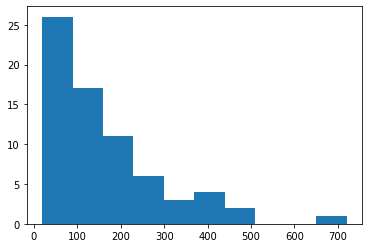

In [20]:
plt.hist(transient_lifetime_lst);

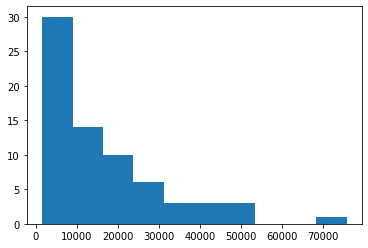

In [22]:
plt.hist(transient_spikes_lst);

# 2. Inspect distributions

### Estimate the parameters $x_{min}$ and $\alpha$


We have to determine what part of the data to fit. We want to know: from what minimal value $x_{min}$ does the scaling relationship of the power law begins. Clauset et al. (2009) find the optimal starting value by taking the one with the shortest Kolmogorov-Smirnov distance between the data and the fit.

- we can also hand pick an `xmin` by looking at the minimum value in the list


###  2.A Testing the power law hypothesis

from [this tutorial](https://cran.r-project.org/web/packages/poweRlaw/vignettes/b_powerlaw_examples.pdf)

"Since it is possible to fit a power law distribution to any data set, it is appropriate to test
whether the observed data set actually follows a power law. Clauset et al. (2009) suggest that
this hypothesis is tested using a goodness-of-fit test, via a bootstrapping procedure. This test
generates a p-value that can be used to quantify the plausibility of the hypothesis. If the p-value
is large, than any difference between the empirical data and the model can be explained with
statistical fluctuations. If $p \approx 0$, then the model does not provide a plausible fit to the data and another distribution may be more appropriate. In this scenario,

H0 : data is generated from a power law distribution.

H1 : data is not generated from a power law distribution.

- now we want to know whether the power law is a plausible fit to the data
- we use goodness of fit tests, which generate a $p$ value that quantifies the plausibility of the hypothesis. These tests are based on the "distance" between the distributed of the empircal data and the hypothesised model.

Method

1. fit our empirical data to the power-law model using the methods of section 3 and calculate the KS statistic for this fit.
2. we generate a large number of power-law distributed synthetic data sets with scaling parameter $α$ and lower bound $xmin$ equal to those of the distribution that best fits the observed data. 
3. We fit each synthetic data set individually to its own power-law model and calculate the KS statistic for each one relative to its own model. 
4. Then we simply count the fraction of the time that the resulting statistic is larger than the value for the empirical data. This fraction is our p-value.


---

While we can never be certain that our observations are drawn from a power law distribution, the following are statistical techniques that help us determine whether our observations are in line with the hypothesis that $x$ is drawn from a distribution in the form of the equation above.

**Recipe for analysing power-law distributed data** (Adapted from Clauset et al., 2009)

1. Estimate the parameters $x_{min}$ and $\alpha$ 
2. Calculate the goodness of fit between the data and the power law.
    - If $p > 0.1$: it is plausible that your data follows a power law distribution.
    - Else: it doesn't follow a power law distribution.
    

[documentation](https://plfit.readthedocs.io/en/latest/apidoc.html#module-plfit.plfit)


PYTHON plfit executed in 0.002484 seconds
xmin: 32.2 n(>xmin): 65 alpha: 1.71103 +/- 0.0881927   Log-Likelihood: -404.262   ks: 0.243912 p(ks): 0.000343018


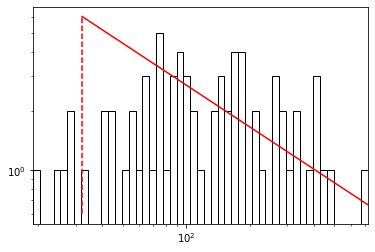

In [13]:
fit = plfit(transient_lifetime_lst, discrete=False)

# plot pdf and powerlaw (red)
fit.plotpdf()

PYTHON plfit executed in 0.002356 seconds
Not enough data left after flagging low S/N points.  Using all data.
(PLFIT) Warning: finite-size bias may be present. n=13
xmin: 1180 n(>xmin): 13 alpha: 261.822 +/- 72.339   Log-Likelihood: -32.6725   ks: 0.129612 p(ks): 0.596678


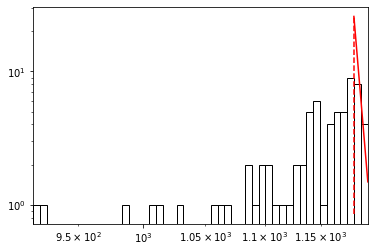

In [14]:
fit = plfit(transient_size_lst, discrete=False)

# plot pdf and powerlaw (red)
fit.plotpdf()

PYTHON plfit executed in 0.002928 seconds
xmin: 3421 n(>xmin): 63 alpha: 1.7304 +/- 0.0920211   Log-Likelihood: -681.722   ks: 0.217946 p(ks): 0.00207997


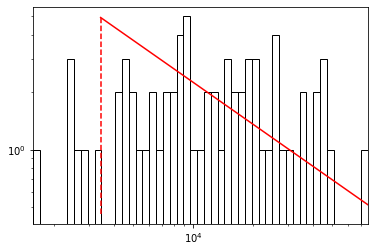

In [15]:
fit = plfit(transient_spikes_lst, discrete=False)

# plot pdf and powerlaw (red)
fit.plotpdf()

## 2.B  Comparing distributions

For most data sets, a power law is actually a worse fit than a lognormal distribution, or perhaps equally good, but rarely better. This fact was one of the central empirical results of the paper Clauset et al. 2007, which developed the statistical methods that `powerlaw` implements.

A second approach to test the power law hypothesis is a direct comparison of two models. [...] The test statistic, R, is the ratio of the log-likelihoods of the data between the two competing models. The sign of R indicates which model is better. 

--- 
from the authors of `powerlaw` (Alstott et al., 2014)

Philosophically, it is frequently insufficient and unnecessary to answer the question of whether a distribution “really” follows a power law. Instead the question is whether a power law is the best description available. It is generally more sound and useful to compare the fits of many candidate distributions, and identify which one fits the best.

The goodness of fit of these distributions must be evaluated before concluding that a power law is a good description of the data. The goodness of fit for each distribution can be considered individually or by comparison to the fit of other distributions (respectively, using bootstrapping and the Kolmogorov-Smirnov test to generate a p-value for an individual fit vs. using loglikelihood ratios to identify which of two fits is better) [5]. There are several reasons, both practical and philosophical, to focus on the latter, comparative tests. ()

---

$R$ is the loglikelihood ratio between the two candidate distributions. The likelihood-ratio test assesses the **goodness of fit** of two competing statistical models based on the ratio of their likelihoods.

This number will be positive if the data is more likely in the first distribution, and negative if the data is more likely in the second distribution. The significance value for that direction is $p$. The normalized_ratio option normalizes $R$ by its standard deviation, . The normalized ratio is what is directly used to calculate p.

- If $R > 0$, the data is more likely in the first distribution, and $R < 0$ if the data is more likely in the second distribution.
- $p$ - The significance of the sign of R. If below a critical value (typically .05) the sign of R is taken to be significant. If above the critical value the sign of R is taken to be due to statistical fluctuations.

Calculating best minimal value for power law fit
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


estimate of alpha: 6.909325144870323
estimate of x min: 389.3
Our minimum value: 18.9
lognormal is the best fit, R = -0.732
R is not significant, p = 0.214


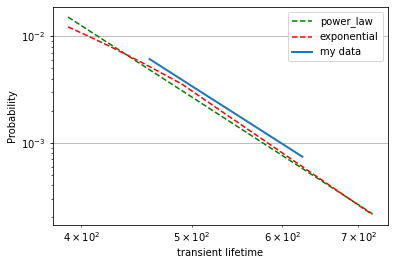

In [16]:
compare_distributions(data=transient_lifetime_lst, x_label='transient lifetime')

Calculating best minimal value for power law fit


estimate of alpha: 261.82180988387415
estimate of x min: 1180.0
Our minimum value: 917
power law is the best fit, R = nan
R is not significant, p = nan


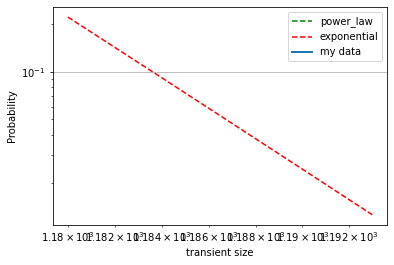

In [17]:
compare_distributions(data=transient_size_lst, x_label='transient size')

Calculating best minimal value for power law fit


estimate of alpha: 3.1698974389798282
estimate of x min: 19011.0
Our minimum value: 1562
lognormal is the best fit, R = -0.629
R is not significant, p = 0.52


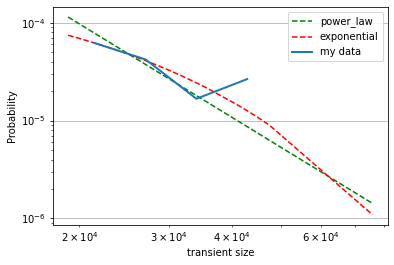

In [18]:
compare_distributions(data=transient_spikes_lst, x_label='transient size')

## Resources

- [Power laws in empirical data](https://arxiv.org/abs/0706.1062), Clauset et al., 2009

- [powerlaw toolbox](https://github.com/jeffalstott/powerlaw) and [powerlaw paper explaining their code](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0085777) 

- [scale free](https://blogs.cornell.edu/info2040/2018/09/17/scale-free-networks-are-rare/) + [scale free paper](https://arxiv.org/abs/1801.03400)

## Functions

In [8]:
import plfit
from plfit import plfit
from numpy.random import rand,seed
import warnings
warnings.filterwarnings('ignore')
import powerlaw

# nest
import nest
import nest.raster_plot
import nest.voltage_trace
# other
import pandas as pd
import os
import json
import time 
import timeit
import itertools
import numpy as np
from importlib import reload 
from itertools import permutations 
from itertools import combinations 
import matplotlib.pyplot as plt
import seaborn as sns

# seed 
np.random.seed(0)

import LeakySimulator as sim
reload(sim); # update changes made in python script

U = sim.Usefulfunctions()

patterns = []
# make permutations for 8 bit pattern
for perm in H.make_permutations():
    patterns.append(perm)
    
# functions

def set_params(J_ex=6., J_in=-95., C_m=250.0, NE=960, NI=240, stim_end=150.):
    
    sim_params = {

            'N_total':1200,
            'NE': 960, # Default: 4/5 are exci neurons, 1/5 are inh neurons
            'NI': 240,
            'eps':0.1,  # connection probability
            'J_in':-95.0,
            'J_ex':6.0,
            'resolution':0.1,  # temporal resolution of simulation in ms. Kumar2008: 0.1
            'delay':1.5,  # synaptic delay in the network
            'n_threads':8,
            'stim_start':0., # start applying current (dc)
            'stim_end':150., # end applying current (dc)
            'simtime':1000., # simulation time 
            'sub_fr':0.9, # subthreshold current amplitude
            'sup_fr':1.01, # suprathreshold current amplitude
        }

    model_params = {

            'C_m': 250.0,
            'E_L': -70.0,
            'E_ex': 0.0,
            'E_in': -80.0,
            'I_e': 0.0,
            'V_reset': -70.0,
            'V_th': -50.0,
            'g_L': 16.7,
            't_ref': 2.0, # Duration of refractory period
            'tau_syn_ex': 0.326, # Rise time of the excitatory synaptic alpha function
            'tau_syn_in': 0.326,
        }

    # parameters for STDP synapses
    
    syn_params_ex = {

            'model':'stdp_synapse',
            'lambda': 0.01,
            'alpha': 1.0,
            'delay': 1.5,
            'weight': 6.0,
            'Wmax': 100.0   
        }

    syn_params_in = {

            'model':'stdp_synapse',
            'lambda': 0.01,
            'alpha': 1.0,
            'delay': 1.5,
            'weight':-95.0,
            'Wmax':-100.0  
        }
    
    
    sim_params['NE'] = NE
    sim_params['NI'] = NI
    sim_params['J_in'] = J_in
    sim_params['J_ex'] = J_ex
    sim_params['C_m'] = C_m
    
    syn_params_ex['weight'] = J_ex
    syn_params_in['weight'] = J_in
    
    return sim_params, model_params, syn_params_ex, syn_params_in


def simulate_all(patterns):

    spikedet_lst = []
    multimet_lst = []

    spike_times_lst = []
    spike_neurons_lst = []
    events_lst = []
    times_lst = []

    for i, p in enumerate(patterns):

        LS.set_pattern(p)

        spikedet, multimet, spike_times, spike_neurons, events, etimes = LS.simulate() 
        spikedet_lst.append(spikedet)
        multimet_lst.append(multimet)
        spike_times_lst.append(spike_times)
        spike_neurons_lst.append(spike_neurons)
        events_lst.append(events)
        times_lst.append(etimes)
        
        if i%20 == 0:
            ('Simulating ...')
        
    return multimet_lst, times_lst, events_lst, spike_times_lst, spike_neurons_lst


def get_transient_data(spike_times_lst, spike_neurons_lst, sim_params):
    '''
    Uses the information from the simulation run to get information about the transient.
    '''
    # convert to np arrays
    spike_times_arr = np.array(spike_times_lst)
    spike_neurons_arr = np.array(spike_neurons_lst)
    
    transient_spikes = []
    transient_lifetime = []
    transient_uniquen = []
    transient_time_arr = []
    
    stim_end = sim_params['stim_end']
    
    for trial in range(len(spike_times_arr)):

        # select data from experiment / trial
        times = spike_times_arr[trial]
        neurons = spike_neurons_arr[trial]

        # === number of spikes ===
        num_trans_spikes = sum(1*(times > stim_end))
        transient_spikes.append(num_trans_spikes)

        # === transient lifetime ===
        transient_time = times[times > stim_end]
        transient_time_arr.append(transient_time)

        if num_trans_spikes == 0:
            transient_lifetime.append(0)
        else:
            t_dur = round(max(transient_time_arr[trial]) - stim_end,2)
            transient_lifetime.append(t_dur)

        # === transient_size ===
        transients = 1*(times > stim_end)
        transient_indices = np.argwhere(transients)
        # take the neurons from these indices
        active_neurons = np.unique(neurons[transient_indices])
        transient_uniquen.append(active_neurons)

    transient_size = [len(i) for i in transient_uniquen]
    
    return transient_spikes, transient_lifetime, transient_size


def plot(transient_mins, transient_means, transient_maxs, x_axis_name, parameter_range):
    '''
    takes in a list of transient means and max values, name for the x_axis (the parameter value that is being changed) 
    and the range of parameter values used.
    
    Plots the graphs.
    '''
    # [mean transient size, mean transient lifetime]
    trans_size_mins = [i[0] for i in transient_mins]
    trans_lifetime_mins = [i[1] for i in transient_mins]
    
    trans_size_means = [i[0] for i in transient_means]
    trans_lifetime_means = [i[1] for i in transient_means]    

    trans_size_maxs = [item[0] for item in transient_maxs]
    trans_lifetime_maxs = [item[1] for item in transient_maxs]

    # === Plot ===
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
    ax1.plot(parameter_range, trans_size_mins, '--go', label='min transient size');
    ax1.plot(parameter_range, trans_size_maxs, '--ro', label ='max transient size');
    ax1.plot(parameter_range, trans_size_means, '--bo', label='mean transient size');
    ax1.set_xlabel(x_axis_name)
    ax1.set_ylabel('transient size (neurons)')
    ax1.legend();
    
    ax2.plot(parameter_range, trans_lifetime_mins, '--go', label ='min transient times');
    ax2.plot(parameter_range, trans_lifetime_maxs, '--ro', label ='max transient times');
    ax2.plot(parameter_range, trans_lifetime_means, '--bo', label='mean transient times');
    ax2.set_xlabel(x_axis_name);
    ax2.set_ylabel('transient lifetime (ms)')
    ax2.legend();
    

def show_rasters(pattern, spike_times, spike_neurons, times, events, stim_end):
    
    fig, (ax1, ax2) = plt.subplots(2, figsize=(22,10))
    plt.suptitle(U.list2str(pattern), size=15)
    # raster plot
    ax1.scatter(spike_times, spike_neurons, marker='o', s=0.08, color='k');
    ax1.set_ylabel('neuron id')
    ax1.axvline(x=0, linewidth=2., color='xkcd:dark blue', linestyle='--')
    ax1.axvline(x=stim_end, linewidth=2., color='xkcd:dark blue', linestyle='--')
    ax1.set_xlim([-20, 1000])

    # voltage
    ax2.plot(times, events['V_m'], color='xkcd:teal')
    ax2.set_ylabel('Membrane potential (mV)')
    ax2.axvline(x=0, linewidth=2., color='xkcd:dark blue', linestyle='--')
    ax2.axvline(x=stim_end, linewidth=2., color='xkcd:dark blue', linestyle='--')
    ax2.axhline(y=-50, linewidth=2.5, color='xkcd:coral', linestyle='-')
    ax2.set_xlim([-20, 1000])
    ax2.set_ylim([-75, -45]);

def compare_distributions(data, x_label, plot_hist=False):
    
    x_min = min(data)
    
    if plot_hist == True:
        
        plt.hist(data)
        plt.xlabel(x_label)
        plt.ylabel('# experiments');
    
    # estimate min x and alpha
    fit = powerlaw.Fit(data)
    print(f'estimate of alpha: {fit.power_law.alpha}')
    print(f'estimate of x min: {fit.power_law.xmin}')
    print(f'Our minimum value: {x_min}')
    
    # compare the fit of power law compared to lognormal
    R, p = fit.distribution_compare('power_law', 'lognormal')
    
    print('========================')
    if R < 0: 
        print(f'lognormal is the best fit, R = {round(R,3)}')
    else: 
        print(f'power law is the best fit, R = {round(R,3)}')
    
    if p < 0.05:
        print(f'R is significant, p = {round(p,3)}')
    else:
        print(f'R is not significant, p = {round(p,3)}')
        
    # plot data
    ax = plt.axes(xscale='log', yscale='log')
    ax.grid(True);
    fit.power_law.plot_pdf(linestyle='--', color='g', label='power_law')
    fit.exponential.plot_pdf(linestyle='--', color='r', label='exponential')
    fit.plot_pdf(linewidth=2, label='my data');
    plt.legend();
    plt.ylabel("Probability")
    plt.xlabel(x_label);